In [2]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 

In [3]:
import requests

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/ecr.l/1d"

headers = {
    'x-rapidapi-key': "9cd97ba3camsh244cbd2e3e420a4p1e83c0jsne0fdd0787f8e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{
    "meta": {
        "currency": "GBp",
        "symbol": "ECR.L",
        "exchangeName": "LSE",
        "instrumentType": "EQUITY",
        "firstTradeDate": 1077177600,
        "regularMarketTime": 1628177403,
        "gmtoffset": 3600,
        "timezone": "BST",
        "exchangeTimezoneName": "Europe/London",
        "regularMarketPrice": 1.7,
        "chartPreviousClose": 300,
        "priceHint": 4,
        "dataGranularity": "1d",
        "range": ""
    },
    "items": {
        "1312527600": {
            "date": "05-08-2011",
            "open": 261,
            "high": 324,
            "low": 240,
            "close": 300,
            "adjclose": 300
        },
        "1312786800": {
            "date": "08-08-2011",
            "open": 296,
            "high": 316,
            "low": 270.4,
            "close": 290,
            "adjclose": 290
        },
        "1312873200": {
            "date": "09-08-2011",
            "open": 270.6,
            "high": 285,
      

In [4]:
string = response.text

In [5]:
def get_dates(string):
    date = re.compile('"date":((.*),)')
    date = date.findall(string)
    date = [i[0][2:12] for i in date]
    date = [datetime.strptime(i, "%d-%m-%Y").strftime("%Y-%m-%d") for i in date]
    return date

In [6]:
date = get_dates(string)
print( date[:5] )

['2011-08-05', '2011-08-08', '2011-08-09', '2011-08-10', '2011-08-11']


In [7]:
def get_close(string):
    close = re.compile('"close":((.*),)')
    close = close.findall(string)
    close = [float(i[1].strip()) for i in close]
    return close

In [8]:
close = get_close(string)
close[:5]

[300.0, 290.0, 275.0, 285.0, 295.0]

In [9]:
print(len(close))
print(len(date[6:]))

2522
2522


In [10]:
ecr = pd.DataFrame({"date":date[6:], "ecr_close":close})
ecr.set_index('date', drop=True, inplace=True)
ecr.tail(3)

ecr_close
date                 
2021-08-03       1.83
2021-08-04       1.80
2021-08-05       1.70

In [11]:
p1_sprice = 0.5
p1_wprice = 1
p1_date = '2020-04-01'
p1_swratio = 1/1
p2_sprice = 1.3
p2_wprice = 2.1
p2_date = '2020-07-01'
p2_swratio = 1/1


In [12]:
ecr['p1_sprice'] = [p1_sprice if i  >= p1_date else None for i in ecr.index]
ecr['p1_wprice'] = [p1_wprice if i  >= p1_date else None for i in ecr.index]

ecr['p2_sprice'] = [p2_sprice if i  >= p2_date else None for i in ecr.index]
ecr['p2_wprice'] = [p2_wprice if i  >= p2_date else None for i in ecr.index]

In [13]:
fund = 10000
split = 2

In [14]:
ecr['p1_sposition'] = [round(fund/2/p1_sprice,2) if i >= p1_date else 0 for i in ecr.index]
ecr['p1_wposition'] = ecr['p1_sposition']*p1_swratio


ecr['p2_sposition'] = [round(fund/2/p2_sprice,2) if i >= p2_date else 0 for i in ecr.index]
ecr['p2_wposition'] = ecr['p2_sposition']*p2_swratio

In [15]:
ecr['p1_sprft'] = ecr.ecr_close - ecr['p1_sprice']


ecr['p2_sprft'] = ecr.ecr_close - ecr['p2_sprice']

In [16]:

p1_wprofit = []
for i,j in zip(ecr.ecr_close, ecr['p1_wprice']):
    if i - j >0:
        p1_wprofit.append(round(i-j,2))
    else:
        p1_wprofit.append(0)

ecr['p1_wprft'] = p1_wprofit

p2_wprofit = []
for i,j in zip(ecr.ecr_close, ecr['p2_wprice']):
    if i - j >0:
        p2_wprofit.append(round(i-j,2))
    else:
        p2_wprofit.append(0)

ecr['p2_wprft'] = p2_wprofit

In [17]:
ecr = ecr.fillna(0)
ecr

ecr_close  p1_sprice  p1_wprice  p2_sprice  p2_wprice  \
date                                                                
2011-08-15     300.00        0.0        0.0        0.0        0.0   
2011-08-16     290.00        0.0        0.0        0.0        0.0   
2011-08-17     275.00        0.0        0.0        0.0        0.0   
2011-08-18     285.00        0.0        0.0        0.0        0.0   
2011-08-19     295.00        0.0        0.0        0.0        0.0   
2011-08-22     310.00        0.0        0.0        0.0        0.0   
2011-08-23     315.00        0.0        0.0        0.0        0.0   
2011-08-24     280.00        0.0        0.0        0.0        0.0   
2011-08-25     300.00        0.0        0.0        0.0        0.0   
2011-08-26     280.00        0.0        0.0        0.0        0.0   
2011-08-30     290.00        0.0        0.0        0.0        0.0   
2011-08-31     290.00        0.0        0.0        0.0        0.0   
2011-09-01     292.00        0.0        0.0        0.0        0.0   
2011-09-02     266.00        0.0        0.0        0.0        0.0   
2011-09-05     300.00        0.0        0.0        0.0        0.0   
2011-09-06     285.00        0.0        0.0        0.0        0.0   
2011-09-07     280.00        0.0        0.0        0.0        0.0   
2011-09-08     275.00        0.0        0.0        0.0        0.0   
2011-09-09     270.00        0.0        0.0        0.0        0.0   
2011-09-12     290.00        0.0        0.0        0.0        0.0   
2011-09-13     270.00        0.0        0.0        0.0        0.0   
2011-09-14     285.00        0.0        0.0        0.0        0.0   
2011-09-15     285.00        0.0        0.0        0.0        0.0   
2011-09-16     275.00        0.0        0.0        0.0        0.0   
2011-09-19     264.00        0.0        0.0        0.0        0.0   
2011-09-20     265.00        0.0        0.0        0.0        0.0   
2011-09-21     265.00        0.0        0.0        0.0        0.0   
2011-09-22     265.00        0.0        0.0        0.0        0.0   
2011-09-23     290.00        0.0        0.0        0.0        0.0   
2011-09-26     275.00        0.0        0.0        0.0        0.0   
2011-09-27     290.00        0.0        0.0        0.0        0.0   
2011-09-28     285.00        0.0        0.0        0.0        0.0   
2011-09-29     280.00        0.0        0.0        0.0        0.0   
2011-09-30     270.00        0.0        0.0        0.0        0.0   
2011-10-03     275.00        0.0        0.0        0.0        0.0   
2011-10-04     265.00        0.0        0.0        0.0        0.0   
2011-10-05     260.00        0.0        0.0        0.0        0.0   
2011-10-06     260.00        0.0        0.0        0.0        0.0   
2011-10-07     260.00        0.0        0.0        0.0        0.0   
2011-10-10     255.00        0.0        0.0        0.0        0.0   
2011-10-11     235.00        0.0        0.0        0.0        0.0   
2011-10-12     230.00        0.0        0.0        0.0        0.0   
2011-10-13     235.00        0.0        0.0        0.0        0.0   
2011-10-14     240.00        0.0        0.0        0.0        0.0   
2011-10-17     250.00        0.0        0.0        0.0        0.0   
2011-10-18     240.00        0.0        0.0        0.0        0.0   
2011-10-19     230.00        0.0        0.0        0.0        0.0   
2011-10-20     230.00        0.0        0.0        0.0        0.0   
2011-10-21     245.00        0.0        0.0        0.0        0.0   
2011-10-24     230.00        0.0        0.0        0.0        0.0   
2011-10-25     225.00        0.0        0.0        0.0        0.0   
2011-10-26     220.00        0.0        0.0        0.0        0.0   
2011-10-27     225.00        0.0        0.0        0.0        0.0   
2011-10-28     225.00        0.0        0.0        0.0        0.0   
2011-10-31     225.00        0.0        0.0        0.0        0.0   
2011-11-01     220.00        0.0        0.0        0.0        0.0   
2011-11-02

In [18]:
ecr['prft_per_share'] = ecr['p1_sprft']+ecr['p2_sprft']+ecr['p1_wprft']+ecr['p2_wprft']
ecr['p1_10k_rtn'] = ecr['p1_sposition']*ecr['p1_sprft']+ecr['p1_wposition']*ecr['p1_wprft']
ecr['p2_10k_rtn'] = ecr['p2_sposition']*ecr['p2_sprft']+ecr['p2_wposition']*ecr['p2_wprft']
ecr['total_rtn'] = ecr['p1_10k_rtn'] + ecr['p2_10k_rtn']

In [19]:
ecr

ecr_close  p1_sprice  p1_wprice  p2_sprice  p2_wprice  \
date                                                                
2011-08-15     300.00        0.0        0.0        0.0        0.0   
2011-08-16     290.00        0.0        0.0        0.0        0.0   
2011-08-17     275.00        0.0        0.0        0.0        0.0   
2011-08-18     285.00        0.0        0.0        0.0        0.0   
2011-08-19     295.00        0.0        0.0        0.0        0.0   
2011-08-22     310.00        0.0        0.0        0.0        0.0   
2011-08-23     315.00        0.0        0.0        0.0        0.0   
2011-08-24     280.00        0.0        0.0        0.0        0.0   
2011-08-25     300.00        0.0        0.0        0.0        0.0   
2011-08-26     280.00        0.0        0.0        0.0        0.0   
2011-08-30     290.00        0.0        0.0        0.0        0.0   
2011-08-31     290.00        0.0        0.0        0.0        0.0   
2011-09-01     292.00        0.0        0.0        0.0        0.0   
2011-09-02     266.00        0.0        0.0        0.0        0.0   
2011-09-05     300.00        0.0        0.0        0.0        0.0   
2011-09-06     285.00        0.0        0.0        0.0        0.0   
2011-09-07     280.00        0.0        0.0        0.0        0.0   
2011-09-08     275.00        0.0        0.0        0.0        0.0   
2011-09-09     270.00        0.0        0.0        0.0        0.0   
2011-09-12     290.00        0.0        0.0        0.0        0.0   
2011-09-13     270.00        0.0        0.0        0.0        0.0   
2011-09-14     285.00        0.0        0.0        0.0        0.0   
2011-09-15     285.00        0.0        0.0        0.0        0.0   
2011-09-16     275.00        0.0        0.0        0.0        0.0   
2011-09-19     264.00        0.0        0.0        0.0        0.0   
2011-09-20     265.00        0.0        0.0        0.0        0.0   
2011-09-21     265.00        0.0        0.0        0.0        0.0   
2011-09-22     265.00        0.0        0.0        0.0        0.0   
2011-09-23     290.00        0.0        0.0        0.0        0.0   
2011-09-26     275.00        0.0        0.0        0.0        0.0   
2011-09-27     290.00        0.0        0.0        0.0        0.0   
2011-09-28     285.00        0.0        0.0        0.0        0.0   
2011-09-29     280.00        0.0        0.0        0.0        0.0   
2011-09-30     270.00        0.0        0.0        0.0        0.0   
2011-10-03     275.00        0.0        0.0        0.0        0.0   
2011-10-04     265.00        0.0        0.0        0.0        0.0   
2011-10-05     260.00        0.0        0.0        0.0        0.0   
2011-10-06     260.00        0.0        0.0        0.0        0.0   
2011-10-07     260.00        0.0        0.0        0.0        0.0   
2011-10-10     255.00        0.0        0.0        0.0        0.0   
2011-10-11     235.00        0.0        0.0        0.0        0.0   
2011-10-12     230.00        0.0        0.0        0.0        0.0   
2011-10-13     235.00        0.0        0.0        0.0        0.0   
2011-10-14     240.00        0.0        0.0        0.0        0.0   
2011-10-17     250.00        0.0        0.0        0.0        0.0   
2011-10-18     240.00        0.0        0.0        0.0        0.0   
2011-10-19     230.00        0.0        0.0        0.0        0.0   
2011-10-20     230.00        0.0        0.0        0.0        0.0   
2011-10-21     245.00        0.0        0.0        0.0        0.0   
2011-10-24     230.00        0.0        0.0        0.0        0.0   
2011-10-25     225.00        0.0        0.0        0.0        0.0   
2011-10-26     220.00        0.0        0.0        0.0        0.0   
2011-10-27     225.00        0.0        0.0        0.0        0.0   
2011-10-28     225.00        0.0        0.0        0.0        0.0   
2011-10-31     225.00        0.0        0.0        0.0        0.0   
2011-11-01     220.00        0.0        0.0        0.0        0.0   
2011-11-02

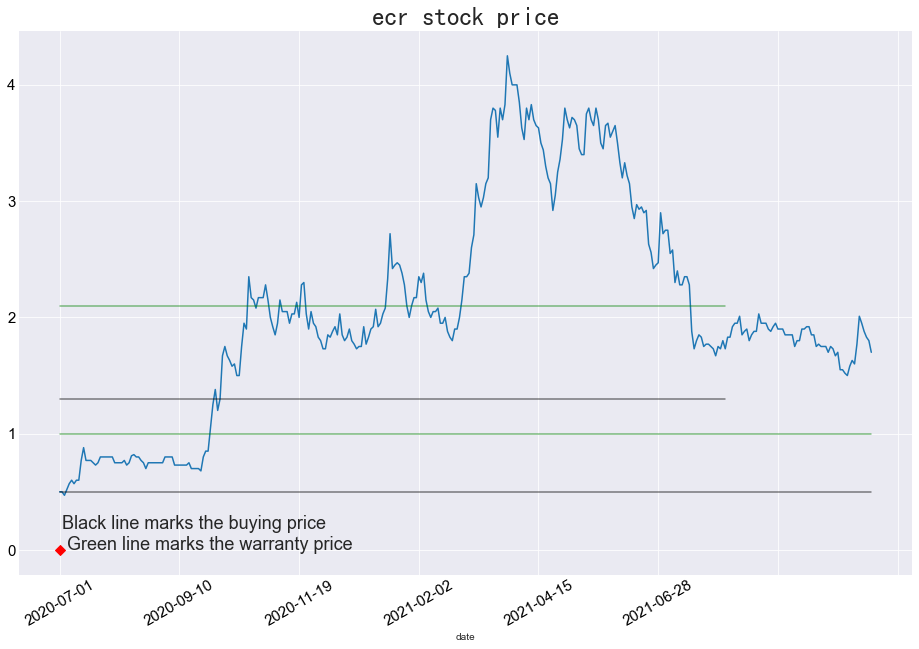

In [50]:
title = 'ecr stock price'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
ecr.ecr_close[ecr.index>= p1_date].plot()
ecr.p1_sprice[ecr.index>=p1_date].plot(color='k', alpha=0.5)
ecr.p2_sprice[ecr.index>=p2_date].plot(color='k', alpha=0.5)
ecr.p1_wprice[ecr.index>=p1_date].plot(color='g', alpha=0.5)
ecr.p2_wprice[ecr.index>=p2_date].plot(color='g', alpha=0.5)
plt.scatter(p1_date, 0, color='r', marker='D', s=50)
plt.text(p1_date, 0, 'Black line marks the buying price \n Green line marks the warranty price', fontsize=18)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend('',loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()

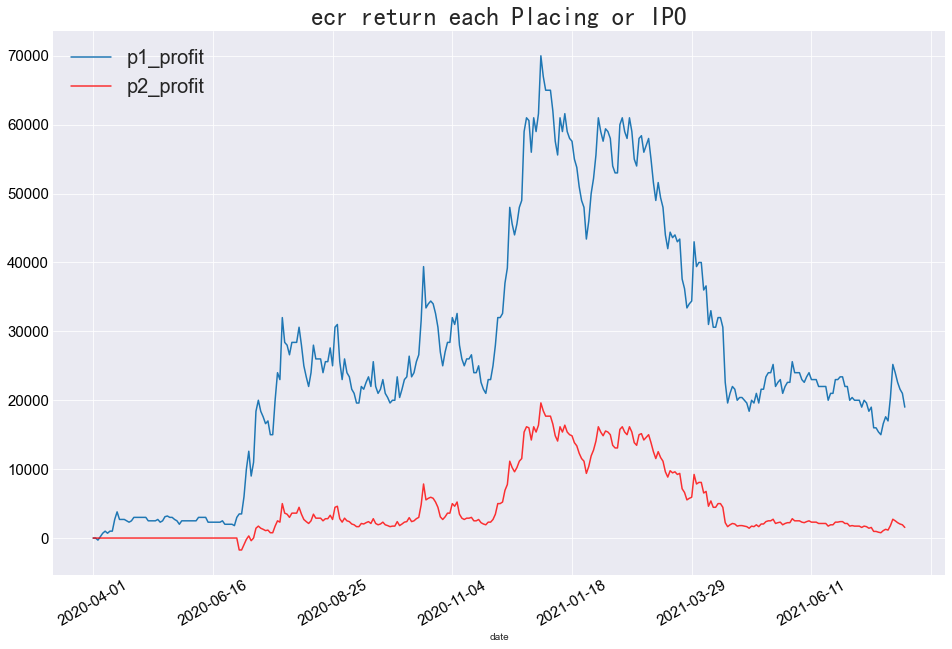

In [48]:
title = 'ecr return each Placing or IPO'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
ecr.p1_10k_rtn[ecr.index >= p1_date ].plot()
ecr.p2_10k_rtn[ecr.index >= p1_date ].plot(color='r', alpha=0.8)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend(('p1_profit','p2_profit'),loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()

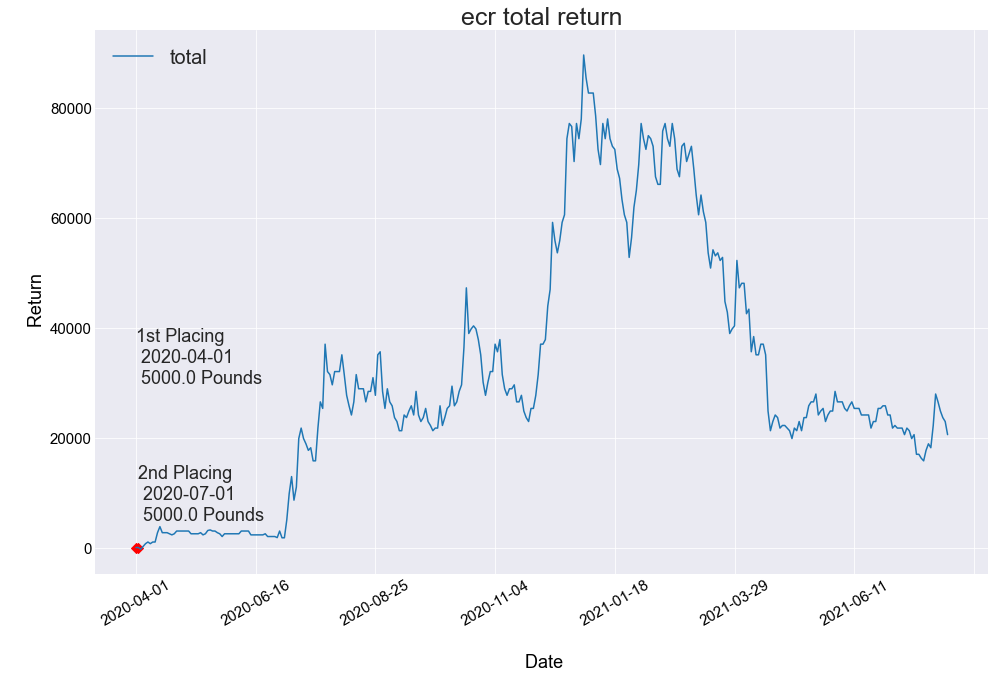

In [25]:
title = 'ecr total return'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
# ecr.loc[ecr.index >= p1_date].p1_10k_rtn.plot()
# ecr.loc[ecr.index >= p1_date].p2_10k_rtn.plot(color='r', alpha=0.8)
ecr.loc[ecr.index >= p1_date].total_rtn.plot()
plt.text(p1_date, 0+30000, '1st Placing \n {} \n {} Pounds'.format(p1_date, fund/split), fontsize=18)
plt.text(p2_date, 0+5000, '2nd Placing \n {} \n {} Pounds'.format(p2_date, fund/split), fontsize=18)
plt.scatter(p1_date, 0, color='r', marker='D', s=50)
plt.scatter(p2_date, 0, color='r', marker='D', s=50)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontsize=25)
plt.legend(['total'],loc="upper left", fontsize=20 )
plt.ylabel('\n Return', fontsize=18, color='k')
plt.xlabel('\n Date', fontsize=18,color='k')
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')

plt.show()

In [41]:
ecr.to_csv(r'/Users/paxton615/Desktop/ecr.csv')